In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob

np.random.seed(1234)

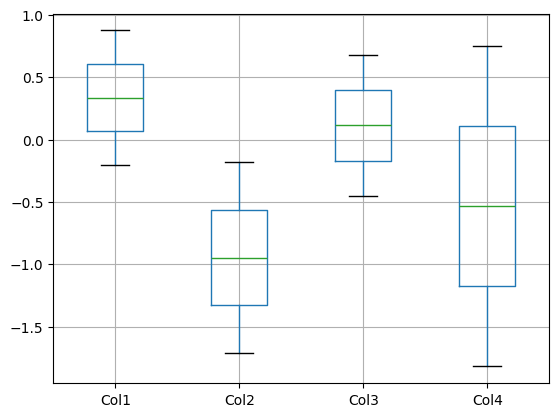

In [39]:
df = pd.DataFrame(np.random.randn(2, 4),
                  columns=['Col1', 'Col2', 'Col3', 'Col4'])
boxplot = df.boxplot(column=['Col1', 'Col2', 'Col3', 'Col4'])  

In [40]:
df = pd.DataFrame(np.random.randn(2, 4),
                  columns=['Col1', 'Col2', 'Col3', 'Col4'])
df.head()

,Col1,Col2,Col3,Col4
0,0.047072,0.394844,-0.248432,-0.617707
1,-0.682884,0.436258,-1.703013,0.393711


In [44]:
results = np.array(
    [[10.62, 26.25, 1.34],
     [10.07, 21.45, 2.68],
     [3.57, 12.04, 1.27],
     [7.48, 29.45, 1.53]]
)

cols = ['Par0003.affine', 'Par0003.bs-R1-fg', 'Par0003.bs-R6-ug']

df = pd.DataFrame(results, columns=cols, index=['copd1', 'copd2', 'copd3', 'copd4'])
df.head()

,Par0003.affine,Par0003.bs-R1-fg,Par0003.bs-R6-ug
copd1,10.62,26.25,1.34
copd2,10.07,21.45,2.68
copd3,3.57,12.04,1.27
copd4,7.48,29.45,1.53


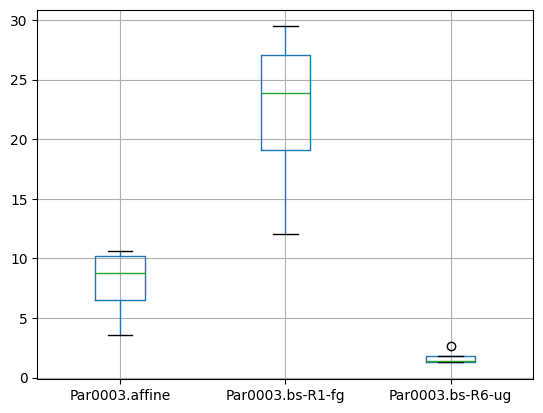

In [51]:
boxplot = df.boxplot(column=cols)  

In [49]:
stats = df.describe()
stats

,Par0003.affine,Par0003.bs-R1-fg,Par0003.bs-R6-ug
count,4.000000,4.000000,4.000000
mean,7.935000,22.297500,1.705000
std,3.215986,7.587601,0.659217
min,3.570000,12.040000,1.270000
25%,6.502500,19.097500,1.322500
50%,8.775000,23.850000,1.435000
75%,10.207500,27.050000,1.817500
max,10.620000,29.450000,2.680000


In [16]:
def plot_boxplot(experiment_name, output_dir, exclude=[], title="Boxplot"):
    '''
    Plot boxplot for the given data.

    Args:
        experiment_name (str): Name of the experiment.
        output_dir (str): Path to the output directory.
        exclude (list): List of columns to exclude from the boxplot.
        title (str): Title of the plot.

    Note:
        The dataframe holds the data in columns. Each column represents an experiment (single box plot) that we want to plot.
        We add the data to specific column of the experiment in the datafraame.

        Each row in the dataframe represents the result obtained from each subject in the experiment.

        >> df.head()
        >>          Par0003.affine  Par0003.bs-R1-fg  Par0003.bs-R6-ug  experiment_name
        >> copd1    10.62             26.25              1.34            ..
        >> copd2    10.07             21.45              2.68            ..
        >> copd3    03.57             12.04              1.27            ..
        >> copd4    07.48             29.45              1.53            ..

        If we describe the dataframe, we get the following:

        >> stats = df.describe()
        >> stats
        >>       Par0003.affine  Par0003.bs-R1-fg  Par0003.bs-R6-ug
        >> count  4.000000        4.000000          4.000000
        >> mean   7.935000        22.795000         1.705000
        >> std    3.417692        7.221071          0.700713
        >> min    3.570000        12.040000         1.270000
        >> 25%    6.345000        19.522500         1.330000
        >> 50%    8.775000        23.850000         1.435000
        >> 75%    10.365000       27.122500         2.060000
        >> max    10.620000       29.450000         2.680000

    Returns:
        None. The function generates and displays the box plot.
    '''

    # Get the data
    columns = os.listdir(f'../output/{experiment_name}/')
    TRE_sample_results = [path.replace('\\', '/') for path in sorted(glob(os.path.join(output_dir, experiment_name, "***", "points", "TRE_sample_results.csv"), recursive=True))]

    # Remove the excluded columns
    for column in exclude:
        if column in columns:
            columns.remove(column)

        TRE_sample_results = [item for item in TRE_sample_results if column not in item]

    # debugging
    # columns = columns[:5]
    # TRE_sample_results = TRE_sample_results[:5]
    # print(columns)
    # print(TRE_sample_results)

    # assert len(columns) == len(TRE_sample_results)
    assert  len(columns) == len(TRE_sample_results), f"Number of columns ({len(columns)}) does not match number of results ({len(TRE_sample_results)})"

    # Create a dataframe
    df = pd.DataFrame(columns=columns)

    for i, path in enumerate(TRE_sample_results):
        # Read the csv file
        data = pd.read_csv(path, index_col=0)

        # Add the data to the dataframe
        columns[i] = columns[i] + f" ({data['TRE_mean'].mean():.3f})"
        df[columns[i]] = data['TRE_mean']
        
    # Plot the boxplot
    boxplot = df.boxplot(column=columns, rot=90)

    # Get the lowest values for each column
    lowest_values = df.mean()

    # Get the column with the overall lowest minimum value
    lowest_column = lowest_values.idxmin()

    # Highlight the entire boxplot for the column with the lowest minimum value in red
    position = columns.index(lowest_column) + 1

    # 7 is the number of data that represents a single boxplot (divide len(boxplot.get_lines())//len(columns) to get the number of data per boxplot)
    boxplot.get_lines()[position * 7 - 7].set(color='red', linewidth=3) 

    # Set plot title
    plt.title(title)

    # Show the plot
    plt.show()

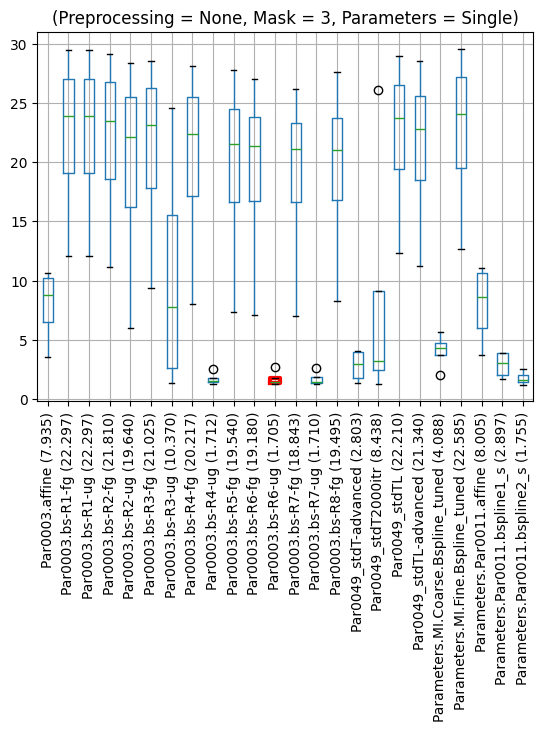

In [4]:
experiment_name = 'NoPreprocessing+UseMasks3+SingleParamFile'
plot_boxplot(
    experiment_name, 
    '../output/', 
    exclude=['Parameters.MI.RP.Bspline_tuned', 'Par0003.bs-R8-ug'],
    title = "(Preprocessing = None, Mask = 3, Parameters = Single)")


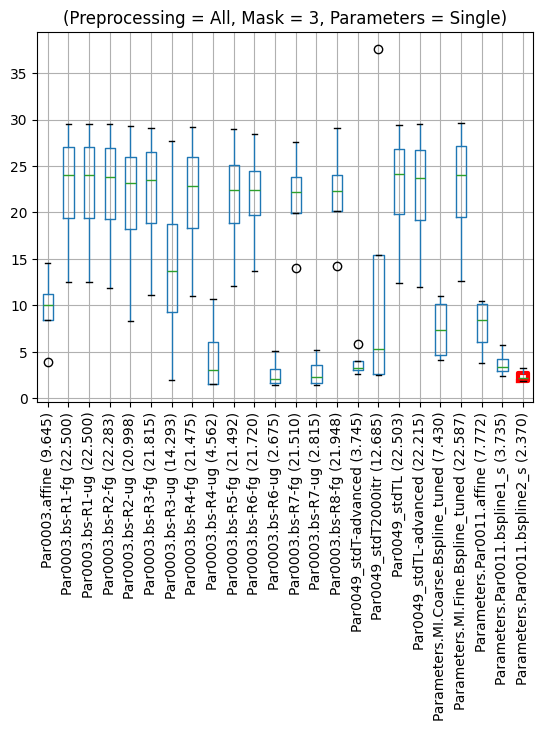

In [6]:
# NoPreprocessing+UseMasks3+SingleParamFile
experiment_name = 'Normalization+Bilateral+CLAHE+UseMasks3+SingleParamFile'
plot_boxplot(
    experiment_name, 
    '../output/', 
    exclude=['Parameters.MI.RP.Bspline_tuned', 'Par0003.bs-R8-ug'],
    title = "(Preprocessing = All, Mask = 3, Parameters = Single)")


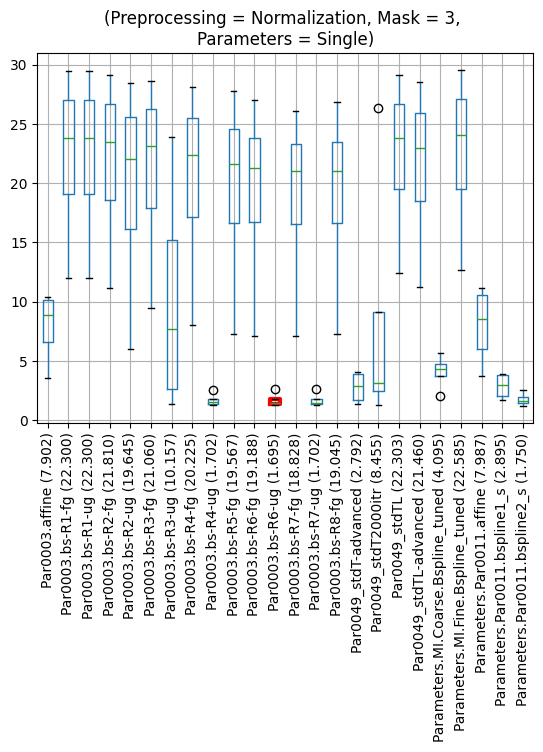

In [21]:
# NoPreprocessing+UseMasks3+SingleParamFile
experiment_name = 'Normalization+UseMasks3+SingleParamFile'
plot_boxplot(
    experiment_name, 
    '../output/', 
    exclude=['Parameters.MI.RP.Bspline_tuned', 'Par0003.bs-R8-ug'],
    title = "(Preprocessing = Normalization, Mask = 3, \nParameters = Single)")


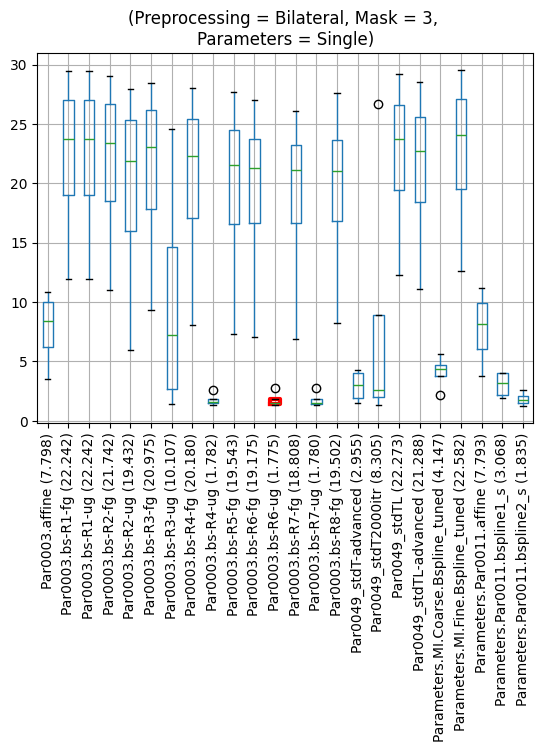

In [20]:
# NoPreprocessing+UseMasks3+SingleParamFile
experiment_name = 'Bilateral+UseMasks3+SingleParamFile'
plot_boxplot(
    experiment_name, 
    '../output/', 
    exclude=['Parameters.MI.RP.Bspline_tuned', 'Par0003.bs-R8-ug'],
    title = "(Preprocessing = Bilateral, Mask = 3, \nParameters = Single)")


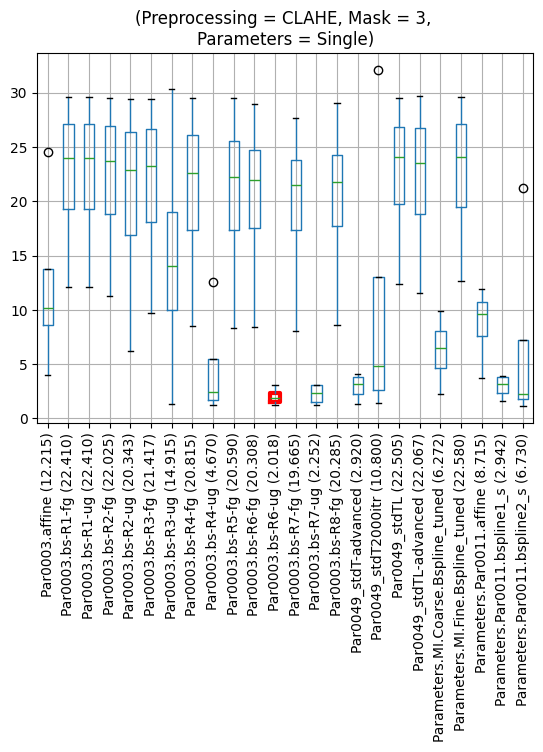

In [19]:
# NoPreprocessing+UseMasks3+SingleParamFile
experiment_name = 'CLAHE+UseMasks3+SingleParamFile'
plot_boxplot(
    experiment_name, 
    '../output/', 
    exclude=['Parameters.MI.RP.Bspline_tuned', 'Par0003.bs-R8-ug'],
    title = "(Preprocessing = CLAHE, Mask = 3, \nParameters = Single)")
